# САМОСТОЯТЕЛЬНЫЙ ПРОЕКТ

# Описание:

Развлекательное приложение Procrastinate Pro+ несмотря на огромные вложения в рекламу, последние несколько месяцев терпит убытки.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

# Цель: 

Разобраться в причинах и помочь компании выйти в плюс.

# Задачи:

Необходимо узнать:

* 		как клиенты пользуются приложением,
* 		когда начинают покупать,
* 		сколько денег приносит каждый клиент,
* 		когда расходы на привлечение клиента окупаются,
* 		какие факторы мешают привлечению клиентов.

----

## Загрузка данных и подготовка к анализу

Загрузим данные о визитах, заказах и расходах в переменные. Оптимизируем данные для анализа. Убедимся, что тип данных в каждой колонке — правильный.

**Импортируем библиотеки, небходимые для работы над проектом:**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

### Загрузим данные о визитах, заказах и расходах в переменные

In [2]:
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info.csv'),  # журнал сессий
    pd.read_csv('/datasets/orders_info.csv'),  # покупки
    pd.read_csv('/datasets/costs_info.csv'),  # траты на рекламу
)

### Подготовим данные к анализу

Проверим корректность типов данных и наличие дубликатов

Для visits:

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
User Id          309901 non-null int64
Region           309901 non-null object
Device           309901 non-null object
Channel          309901 non-null object
Session Start    309901 non-null object
Session End      309901 non-null object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,01.05.2019 02:36,01.05.2019 02:45
1,278965908054,United States,iPhone,organic,01.05.2019 04:46,01.05.2019 04:47
2,590706206550,United States,Mac,organic,01.05.2019 14:09,01.05.2019 15:32
3,326433527971,United States,Android,TipTop,01.05.2019 00:29,01.05.2019 00:54
4,349773784594,United States,Mac,organic,01.05.2019 03:33,01.05.2019 03:57


Приведем следующие столбцы к новому типу данных: 

- Session Start/End - to datetime
- Channel, Device, Region - to category

In [5]:
time_format = '%d.%m.%Y %H:%M'

In [6]:
visits['Session Start'] = pd.to_datetime(visits['Session Start'], format=time_format)

In [7]:
visits['Session End'] = pd.to_datetime(visits['Session End'], format=time_format)

In [8]:
visits['Channel'] = visits['Channel'].astype('category')

In [9]:
visits['Region'] = visits['Region'].astype('category')

In [10]:
visits['Device'] = visits['Device'].astype('category')

In [11]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
User Id          309901 non-null int64
Region           309901 non-null category
Device           309901 non-null category
Channel          309901 non-null category
Session Start    309901 non-null datetime64[ns]
Session End      309901 non-null datetime64[ns]
dtypes: category(3), datetime64[ns](2), int64(1)
memory usage: 8.0 MB


Проверим наличие дубликатов:

In [12]:
visits.duplicated().sum()

0

В именах столбцов избавимся от пробелов и заглавных букв:

In [13]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

**Для orders:**

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
User Id     40212 non-null int64
Event Dt    40212 non-null object
Revenue     40212 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [15]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Приведем следующие столбцы к новому типу данных: 

- Event Dt - to datetime

In [16]:
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])

In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
User Id     40212 non-null int64
Event Dt    40212 non-null datetime64[ns]
Revenue     40212 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Проверим наличие дубликатов:

In [18]:
orders.duplicated().sum()

0

В именах столбцов избавимся от пробелов и заглавных букв:

In [19]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

**Для costs:**

In [20]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
Channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [21]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Приведем следующие столбцы к новому типу данных: 

- Channel - to category
- dt - to datetime

In [22]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [23]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
Channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Проверим наличие дубликатов:

In [24]:
costs.duplicated().sum()

0

В именах столбцов избавимся от пробелов и заглавных букв:

In [25]:
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

---

## Проведите исследовательский анализ данных

Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

Выясним:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

### Пользовательские профили

Получим профили пользователей. 

Для этого вызовем функцию get_profiles(), передав ей данные о посещениях, покупках и расходах на рекламу:

In [26]:
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles

In [27]:
profiles = get_profiles(visits, orders, costs)

In [28]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:00,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:00,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:00,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:00,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:00,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


**ВЫВОД**

С помощью функции get_profiles мы получили новые данные: 

- дату и месяц первого посещения 
- признак платящего пользователя 
- стоимость привлечения для каждого пользователя

---

### Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?

Распределение пользователей по странам: 

In [29]:
profiles.groupby('region').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']}
                              ).sort_values([('payer', 'mean')], ascending=False
                                           ).style.format({('payer', 'sum'): '{:.0f}', ('payer', 'mean'): '{:.2%}'})

### Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?

In [30]:
profiles.groupby('device').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']}
                              ).sort_values([('payer', 'mean')], ascending=False
                                           ).style.format({('payer', 'sum'): '{:.0f}', ('payer', 'mean'): '{:.2%}'})

### По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [31]:
profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']}
                               ).sort_values([('payer', 'mean')], ascending=False
                                            ).style.format({('payer', 'sum'): '{:.0f}', ('payer', 'mean'): '{:.2%}'})

### Выводы

- наибольшее количество посетителей и платящих пользователей в приложение приходит из США (причем, с большим отрывом от других стран)

- из всех устройств чаще всего пользователи заходят и платят с мобильных платформ: iPhone и Android, а наибольшая доля платящих у Mac и iPhone

- из всех каналов больше всего пришло пользователей из поисковых систем (organic), но в этом же канале - самая низкая доля платящих 

- самая большая доля платящих пользователей приходится на каналы FaceBoom, AdNonSense, lambdaMediaAds

- самая низкая доля платящих пользователей приходится на каналы LeapBob, OppleCreativeMedia и вышеупомянутый organic

In [32]:
# посмотрим как рекламные каналы распределены по регионам
profiles.groupby(['region', 'channel']
                ).agg({'user_id': 'nunique'}
                                           ).sort_values(by=['region', 'user_id'], ascending=False)

user_id
region        channel                    
United States organic               38173
              FaceBoom              29144
              TipTop                19561
              RocketSuperAds         4448
              MediaTornado           4364
              YRabbit                4312
UK            organic                6421
              OppleCreativeMedia     3052
              LeapBob                3046
              WahooNetBanner         3003
              AdNonSense             1295
              lambdaMediaAds          758
Germany       organic                5453
              WahooNetBanner         2579
              OppleCreativeMedia     2562
              LeapBob                2519
              AdNonSense             1219
              lambdaMediaAds          649
France        organic                6392
              OppleCreativeMedia     2991
              LeapBob                2988
              WahooNetBanner         2971
              AdNonSense             1366
              lambdaMediaAds          742

- самыми популярными каналами в Великобритании, Германии и Франции являются: OppleCreativeMedia, WahooNetBanner, LeapBob

- Очевидно, что FaceBoom и TipTop поднимаются на верхние строчки общего рейтинга рекламных каналов только благодаря США, где привлечение пользователей из этих каналов наиболее успешно.

- Также, мы видим, что канал organic занимает верхние строчки во всех регионах

## Постройте отчёты и посчитайте метрики
Продукт:

-    Сколько людей пользуются в день, неделю, месяц?
-    Сколько сессий в день?
-    Сколько длится одна сессия?

Продажи:

- Когда люди начинают покупать?
- Сколько покупок делает в среднем платящий пользователь за месяц, неделю, день?
- Какой средний чек за месяц, неделю, день?

Маркетинг:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

### Продукт:
**-    Сколько людей пользуются в день, неделю, месяц?**

Посещений в день

In [33]:
# для группировки по временным категориям в отдельные столбцы вынесем месяц, неделю и день каждого посещения
visits['session_month'] = visits['session_start'].astype('datetime64[M]')
visits['session_week'] = visits['session_start'].astype('datetime64[W]')
visits['session_date'] = visits['session_start'].dt.date

In [34]:
#количество уникальных посетителей за каждый день
DAU = visits.groupby('session_date').agg({'user_id':'nunique'})

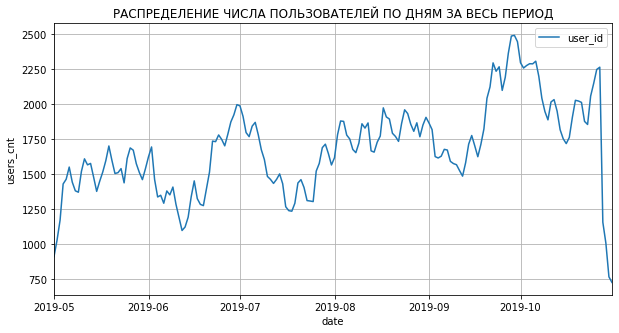

In [35]:
DAU.plot(figsize=(10, 5))
plt.xlabel('date')
plt.ylabel('users_cnt')
plt.title('РАСПРЕДЕЛЕНИЕ ЧИСЛА ПОЛЬЗОВАТЕЛЕЙ ПО ДНЯМ ЗА ВЕСЬ ПЕРИОД')
plt.grid(True)
plt.show()

In [36]:
#среднее значение 
DAU.mean()

user_id    1684.23913
dtype: float64

- В распредлении наблюдается цикличность: примерно раз в три месяца мы видим резкий рост числа посетителей в день и последующее резкое падение. Рост может совпадать с проведением рекламных компаний и привлечением большого количества новых пользователей. Падение - с низкой динамикой удержания привлеченных пользователей. 

- В среднем число пользователей растёт, но, как мы уже отметили, с периодами резкого роста/падения

Посещений в неделю

In [37]:
#количество уникальных посетителей за каждую неделю
WAU = visits.groupby('session_week').agg({'user_id':'nunique'})

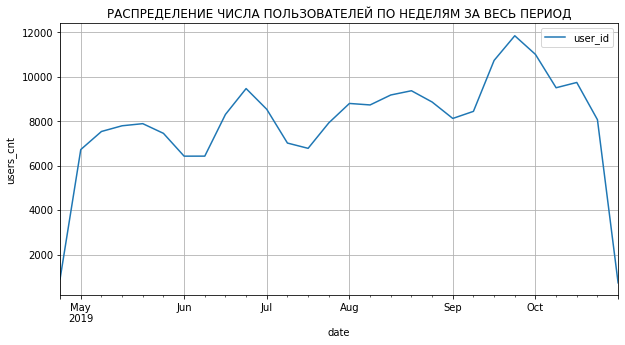

In [38]:
WAU.plot(figsize=(10, 5))
plt.xlabel('date')
plt.ylabel('users_cnt')
plt.title('РАСПРЕДЕЛЕНИЕ ЧИСЛА ПОЛЬЗОВАТЕЛЕЙ ПО НЕДЕЛЯМ ЗА ВЕСЬ ПЕРИОД')
plt.grid(True)
plt.show()

In [39]:
#среднее значение 
WAU.mean()

user_id    7942.214286
dtype: float64

- Аналогичная картина (как в случае с распределения по дням) наблюдается и в динамике количества посетителей по неделям
- Лишний раз можно убедиться в том, что наиболее количество пользователей мы обычно можем наблюдать после второй половины месяца. Наименьшее количество - в начале месяца

Посещений в месяц

In [40]:
#количество уникальных посетителей за каждый месяц
MAU = visits.groupby('session_month').agg({'user_id':'nunique'})

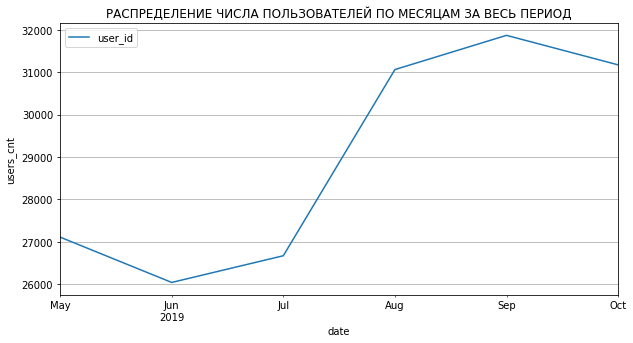

In [41]:
MAU.plot(figsize=(10, 5))
plt.xlabel('date')
plt.ylabel('users_cnt')
plt.title('РАСПРЕДЕЛЕНИЕ ЧИСЛА ПОЛЬЗОВАТЕЛЕЙ ПО МЕСЯЦАМ ЗА ВЕСЬ ПЕРИОД')
plt.grid(True)
plt.show()

In [42]:
#среднее значение
MAU.mean()

user_id    28989.166667
dtype: float64

- На графике с распределением пользователей по месяцам можно наиболее четко увидеть тенденцию роста: после небольшого падения в июне, далее, наблюдается резкий рост уникальных пользователей, но уже в сентябре он прекращается.

- Очевидно, что рекламные компании по привлечению новых пользователей сработали на короткую перспективу. Всего через 2-3 месяца темпы замедлились и вышли на стабильные показатели. 

---

**Сколько сессий в день?**

In [43]:
# сгруппируем по дням количество сессий и количество пользователей
sessions_per_user = visits.groupby(['session_date']).agg({'user_id':['count','nunique']})

In [44]:
sessions_per_user.columns = ['n_sessions', 'n_users']

In [45]:
# посчитаем количество сессий на одного пользователя
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'
                                                          ] / sessions_per_user['n_users']

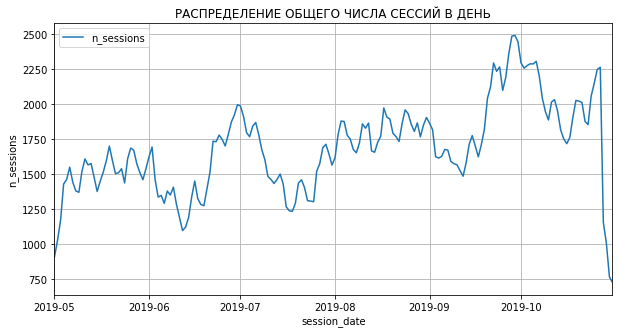

In [46]:
sessions_per_user[['n_sessions']].plot(figsize=(10, 5))
plt.xlabel('session_date')
plt.ylabel('n_sessions')
plt.title('РАСПРЕДЕЛЕНИЕ ОБЩЕГО ЧИСЛА СЕССИЙ В ДЕНЬ')
plt.grid(True)
plt.show()

In [47]:
sessions_per_user['n_sessions'].mean()

1684.2445652173913

In [48]:
DAU.mean()

user_id    1684.23913
dtype: float64

- графики распределения сессий и распределения пользователей повторяют друг друга, а их средние значения сходятся практически полностью: это означает, что наши пользователи предпочитают не пользоваться приложением больше одного раза в день

**- Сколько длится одна сессия?**

In [49]:
#длительность сессии в секундах
visits['sessions_duration_sec'] = (visits['session_end'] - visits['session_start']
                                  ).dt.seconds

In [50]:
#средняя длительность сессии по месяцам
session_duration = visits.groupby(['session_month']).agg({'sessions_duration_sec':'mean'})

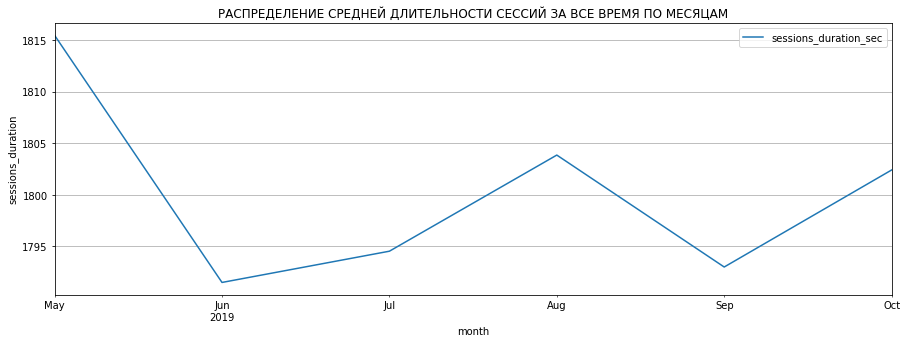

In [51]:
session_duration.plot(figsize=(15, 5))
plt.xlabel('month')
plt.ylabel('sessions_duration')
plt.title('РАСПРЕДЕЛЕНИЕ СРЕДНЕЙ ДЛИТЕЛЬНОСТИ СЕССИЙ ЗА ВСЕ ВРЕМЯ ПО МЕСЯЦАМ')
plt.grid(True)
plt.show()

- Начало и конец графика уходят вверх, так как данные за май/октябрь неполные. Соответственно, средняя длительность сессий для этих месяцев может сильно отличаться от месяцев с полными данными. 

- Мы видим, в среднем, достаточно стабильное распределение длительности сессии по месяцам, однако в августе наблюдаем пик - вспомним, что именно в этом месяце мы видели резкий рост числа пользователей. Скорее всего, именно это и является причиной роста длительности сессий.

- Обратное падение в сентябре снова наталкивает нас на мысль о том, что привлеченные в августе пользователи в долгосрочной перспективе не показывают положительных динамик.

In [52]:
#общая медианная длительность сессии
visits['sessions_duration_sec'].median()

1260.0

In [53]:
visits['sessions_duration_sec'].describe()

count    309901.000000
mean       1800.084801
std        1803.189827
min           0.000000
25%         540.000000
50%        1260.000000
75%        2520.000000
max       22260.000000
Name: sessions_duration_sec, dtype: float64

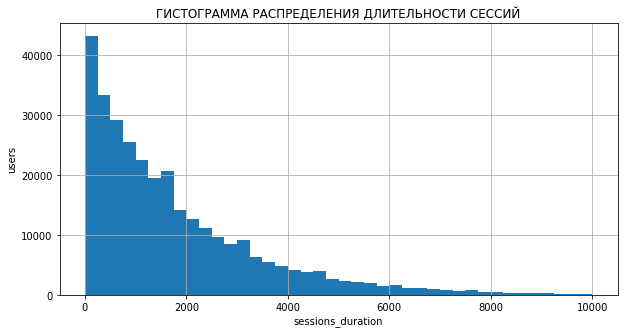

In [54]:
visits[['sessions_duration_sec']].hist(figsize=(10, 5), bins=40, range=(0,10000))
plt.xlabel('sessions_duration')
plt.ylabel('users')
plt.title('ГИСТОГРАММА РАСПРЕДЕЛЕНИЯ ДЛИТЕЛЬНОСТИ СЕССИЙ')
plt.grid(True)
plt.show()

- Гистограмма распределения длительности сессий чётко указывает на то, что большинство сессий продлились менее 5000 секунд. Распределение не является нормальным.

- Значения медианы и среднего отличаются, так как на среднее влияют выбросы в данных о длительности сессий. Объективные значения о средней длительности больше стремятся к медианному значению, что опять же подтверждает гистограмма.

### Продажи:

**- Когда люди начинают покупать?**

In [55]:
#дата первой покупки для каждого пользователя
first_orders = (orders.groupby('user_id').agg({'event_dt':'min'})
               .rename(columns={'event_dt':'first_order'})
                .reset_index()
              )

In [56]:
first_orders.head()

,user_id,first_order
0,599326,2019-05-07 20:59:09
1,46006712,2019-06-30 03:46:52
2,374052872,2019-08-16 07:44:47
3,414791703,2019-05-04 18:06:41
4,785077127,2019-06-30 18:35:15


In [57]:
#соединим таблицы с данными о первой покупке и первой сессии
pay_time = first_orders.merge(profiles, on=['user_id'], how='left')

#оставим только те столбцы, которые понадобятся для расчетов
pay_time = pay_time.drop(columns=
                         ['channel', 'device', 'region', 'dt'
                          , 'month', 'payer', 'acquisition_cost'])

pay_time.columns = ['user_id', 
                   'first_order',
                   'first_session']

In [58]:
pay_time.head()

,user_id,first_order,first_session
0,599326,2019-05-07 20:59:09,2019-05-07 20:58:00
1,46006712,2019-06-30 03:46:52,2019-06-30 03:46:00
2,374052872,2019-08-16 07:44:47,2019-08-08 15:42:00
3,414791703,2019-05-04 18:06:41,2019-05-03 12:01:00
4,785077127,2019-06-30 18:35:15,2019-06-27 08:31:00


In [59]:
#посчитаем на какой день после использваония приложения пользователь совершал свою первую покупку

pay_time['pay_time'] = (pay_time['first_order'] - pay_time['first_session']
                       ).dt.total_seconds() // 86400 #86400 - количество секунд в сутках

In [60]:
pay_time.head()

,user_id,first_order,first_session,pay_time
0,599326,2019-05-07 20:59:09,2019-05-07 20:58:00,0.0
1,46006712,2019-06-30 03:46:52,2019-06-30 03:46:00,0.0
2,374052872,2019-08-16 07:44:47,2019-08-08 15:42:00,7.0
3,414791703,2019-05-04 18:06:41,2019-05-03 12:01:00,1.0
4,785077127,2019-06-30 18:35:15,2019-06-27 08:31:00,3.0


In [61]:
#среднее время первой покупки
pay_time['pay_time'].median()

0.0

In [62]:
pay_time['pay_time'].describe()

count    8881.000000
mean        1.702511
std         5.944318
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       132.000000
Name: pay_time, dtype: float64

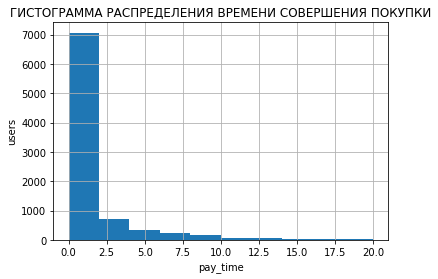

In [63]:
pay_time[['pay_time']].hist(bins=10, range=(0,20))
plt.xlabel('pay_time')
plt.ylabel('users')
plt.title('ГИСТОГРАММА РАСПРЕДЕЛЕНИЯ ВРЕМЕНИ СОВЕРШЕНИЯ ПОКУПКИ')
plt.grid(True)
plt.show()

- Гистограмма распределения времени совершения покупки указывает на то, что большинство покупок были совершены в первые 2 дня после первого посещения. Распределение не является нормальным.

- Значения медианы и среднего отличаются, так как на среднее влияют сильные выбросы в данных о времени покупки. Таким образом, можно полагать, что большинство покупок были совершены в первые сутки после первой сессии.

---

**- Сколько покупок делает в среднем платящий пользователь за месяц, неделю, день?**

In [64]:
#возьмем таблицу с покупками для создания нового фрейма с расчетами
purchaise = orders

In [65]:
#для каждого пользователя посчитаем месяц, неделю и дату покупки
purchaise['month'] = purchaise['event_dt'].astype('datetime64[M]')
purchaise['week'] = purchaise['event_dt'].astype('datetime64[W]')
purchaise['date'] = purchaise['event_dt'].dt.date

In [66]:
purchaise.head()

,user_id,event_dt,revenue,month,week,date
0,188246423999,2019-05-01 23:09:52,4.99,2019-05-01,2019-04-25,2019-05-01
1,174361394180,2019-05-01 12:24:04,4.99,2019-05-01,2019-04-25,2019-05-01
2,529610067795,2019-05-01 11:34:04,4.99,2019-05-01,2019-04-25,2019-05-01
3,319939546352,2019-05-01 15:34:40,4.99,2019-05-01,2019-04-25,2019-05-01
4,366000285810,2019-05-01 13:59:51,4.99,2019-05-01,2019-04-25,2019-05-01


Покупки за месяц

In [67]:
#сгруппируем данные о количестве покупок по месяцам
purchaises_per_month = purchaise.groupby('month'
                                        ).agg({'user_id':'nunique','event_dt':'count'})

purchaises_per_month.columns = ['buyers', 'orders']

#количество покупок за месяц для каждого уникального пользователя
purchaises_per_month['orders_per_buyer'] = purchaises_per_month['orders'
                                                           ] / purchaises_per_month['buyers']

In [68]:
purchaises_per_month.head()

,buyers,orders,orders_per_buyer
month,,,
2019-05-01,1226,2962,2.415987
2019-06-01,2130,4875,2.288732
2019-07-01,2801,6556,2.340593
2019-08-01,3476,7582,2.181243
2019-09-01,4124,8430,2.044132


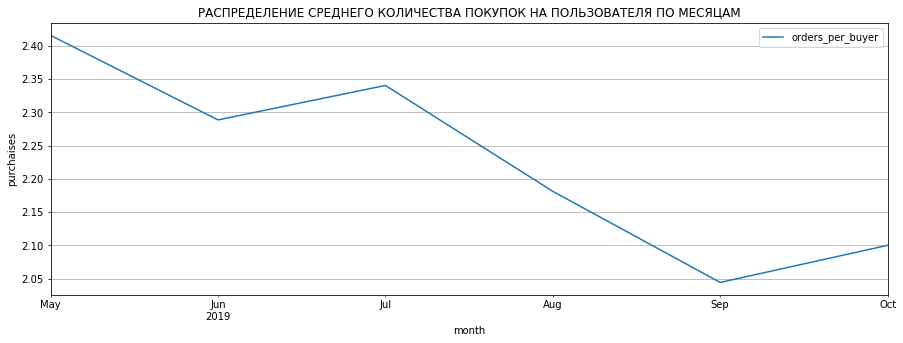

In [69]:
purchaises_per_month[['orders_per_buyer']].plot(figsize=(15, 5))
plt.xlabel('month')
plt.ylabel('purchaises')
plt.title('РАСПРЕДЕЛЕНИЕ СРЕДНЕГО КОЛИЧЕСТВА ПОКУПОК НА ПОЛЬЗОВАТЕЛЯ ПО МЕСЯЦАМ')
plt.grid(True)
plt.show()

In [70]:
#общее среднее количество покупок за месяц
purchaises_per_month['orders_per_buyer'].mean()

2.228447784645054

- С приходом новых пользователей в августе их количество стало сильно влиять на общее среднее количество покупок и 
этот показатель упал. Это обращает наше внимание на то, что с приходом новых юзеров количество покупок не увеличивается, а остается прежним. 

Покупки за неделю

In [71]:
#сгруппируем данные о количестве покупок по неделям
purchaises_per_week = purchaise.groupby('week'
                                        ).agg({'user_id':'nunique','event_dt':'count'})

purchaises_per_week.columns = ['buyers', 'orders']

#количество покупок за неделю для каждого уникального пользователя
purchaises_per_week['orders_per_buyer'] = purchaises_per_week['orders'
                                                           ] / purchaises_per_week['buyers']

In [72]:
purchaises_per_week.head()

,buyers,orders,orders_per_buyer
week,,,
2019-04-25,25,25,1.000000
2019-05-02,268,404,1.507463
2019-05-09,395,620,1.569620
2019-05-16,523,767,1.466539
2019-05-23,617,875,1.418152


In [73]:
#общее среднее количество покупок за месяц
purchaises_per_week['orders_per_buyer'].mean()

1.3161715525537907

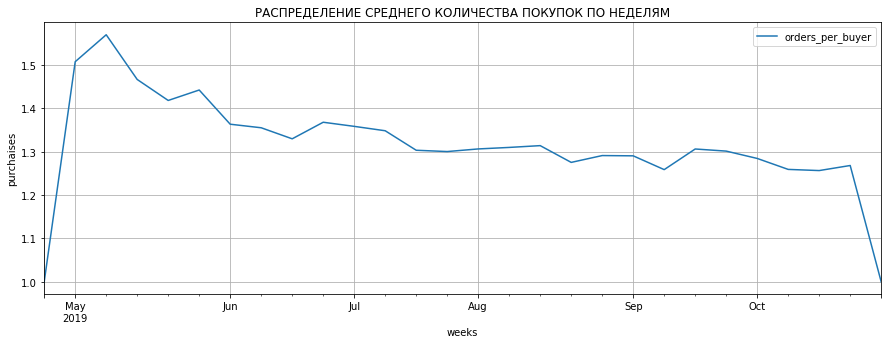

In [74]:
purchaises_per_week[['orders_per_buyer']].plot(figsize=(15, 5))
plt.xlabel('weeks')
plt.ylabel('purchaises')
plt.title('РАСПРЕДЕЛЕНИЕ СРЕДНЕГО КОЛИЧЕСТВА ПОКУПОК ПО НЕДЕЛЯМ')
plt.grid(True)
plt.show()

- Аналогичная с распределением по месяцам тенденция наблюдается в распредлении покупок по неделям

Покупки за день

In [75]:
#сгруппируем данные о количестве покупок по дням
purchaises_per_day = purchaise.groupby('date'
                                        ).agg({'user_id':'nunique','event_dt':'count'})

purchaises_per_day.columns = ['buyers', 'orders']

#количество покупок за день для каждого уникального пользователя
purchaises_per_day['orders_per_buyer'] = purchaises_per_day['orders'
                                                           ] / purchaises_per_day['buyers']

In [76]:
purchaises_per_day.head()

,buyers,orders,orders_per_buyer
date,,,
2019-05-01,25,25,1.0
2019-05-02,29,29,1.0
2019-05-03,44,44,1.0
2019-05-04,56,56,1.0
2019-05-05,58,58,1.0


In [77]:
#общее среднее количество покупок за день
purchaises_per_day['orders_per_buyer'].mean()

1.0000345022303812

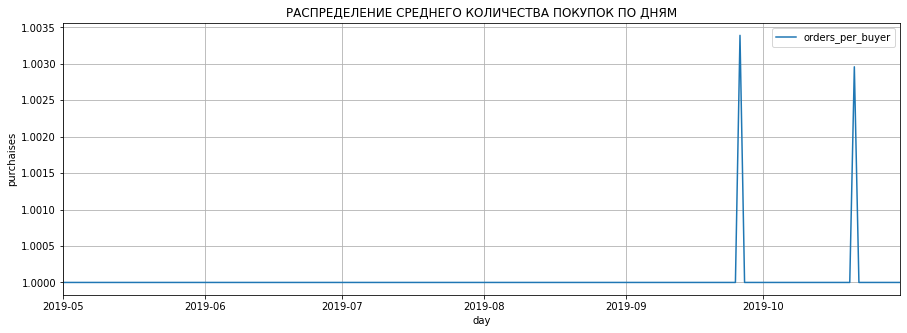

In [78]:
purchaises_per_day[['orders_per_buyer']].plot(figsize=(15, 5))
plt.xlabel('day')
plt.ylabel('purchaises')
plt.title('РАСПРЕДЕЛЕНИЕ СРЕДНЕГО КОЛИЧЕСТВА ПОКУПОК ПО ДНЯМ')
plt.grid(True)
plt.show()

- Здесь мы можем увидеть то, что предполагали ранее: среднее количество покупок остается неизменным весь период исследования

---

**- Какой средний чек за месяц, неделю, день?**

Средний чек за месяц

In [79]:
# сгруппируем данные о покупках по месяцам  
ATV_month = purchaise.groupby('month').agg({'event_dt':'count','revenue':'sum'})
ATV_month.columns = ['purchaises', 'value']
ATV_month.head()

,purchaises,value
month,,
2019-05-01,2962,15787.38
2019-06-01,4875,26428.25
2019-07-01,6556,35988.44
2019-08-01,7582,40401.18
2019-09-01,8430,44941.70


In [80]:
# найдем средний чек: сумма / количество покупок
ATV_month['ATV'] = ATV_month['value'] / ATV_month['purchaises']
# общий средний чек за месяц
ATV_month['ATV'].mean()

5.374169416181577

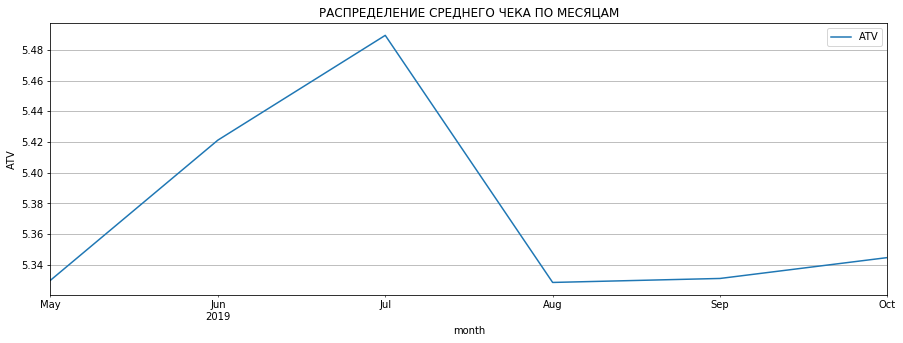

In [81]:
ATV_month[['ATV']].plot(figsize=(15, 5))
plt.xlabel('month')
plt.ylabel('ATV')
plt.title('РАСПРЕДЕЛЕНИЕ СРЕДНЕГО ЧЕКА ПО МЕСЯЦАМ')
plt.grid(True)
plt.show()

- показатели среднего чека распределены примерно также, как показатели среднего количества покупок. А в ситуации, где средний чек не растет, а количество пользвователей увеличивается - падение на нашем графике неизбежно.

Средний чек за неделю

In [82]:
# сгруппируем данные о покупках по неделям  
ATV_week = purchaise.groupby('week').agg({'event_dt':'count','revenue':'sum'})
ATV_week.columns = ['purchaises', 'value']
ATV_week.head()

,purchaises,value
week,,
2019-04-25,25,125.75
2019-05-02,404,2242.96
2019-05-09,620,3266.80
2019-05-16,767,4020.33
2019-05-23,875,4689.25


In [83]:
# найдем средний чек: сумма / количество покупок
ATV_week['ATV'] = ATV_week['value'] / ATV_week['purchaises']
# общий средний чек за неделю
ATV_week['ATV'].mean()

5.363434790693549

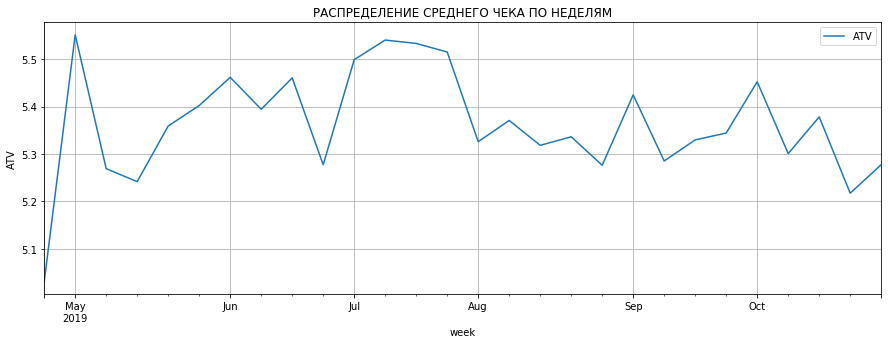

In [84]:
ATV_week[['ATV']].plot(figsize=(15, 5))
plt.xlabel('week')
plt.ylabel('ATV')
plt.title('РАСПРЕДЕЛЕНИЕ СРЕДНЕГО ЧЕКА ПО НЕДЕЛЯМ')
plt.grid(True)
plt.show()

- В среднем, распределение примерно стабильное. Отметить можно лишь пик в июле - августе, опять же, на волне привлечения новых пользователей

Средний чек за день

In [85]:
# сгруппируем данные о покупках по дням
ATV_day = purchaise.groupby('date').agg({'event_dt':'count','revenue':'sum'})
ATV_day.columns = ['purchaises', 'value']
ATV_day.head()

,purchaises,value
date,,
2019-05-01,25,125.75
2019-05-02,29,144.71
2019-05-03,44,221.56
2019-05-04,56,327.44
2019-05-05,58,337.42


In [86]:
# найдем средний чек: сумма / количество покупок
ATV_day['ATV'] = ATV_day['value'] / ATV_day['purchaises']
# общий средний чек за день
ATV_day['ATV'].mean()

5.375884247160584

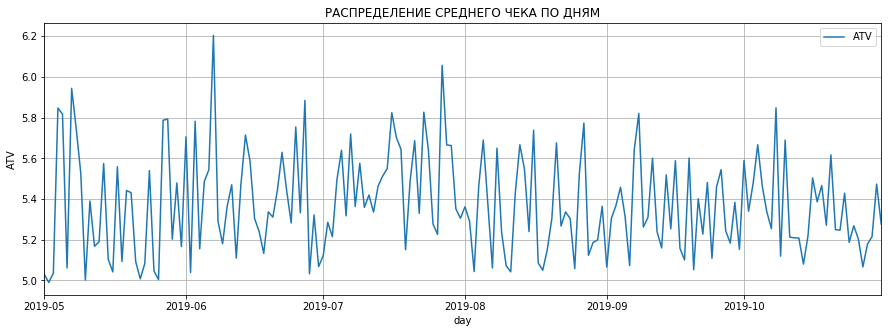

In [87]:
ATV_day[['ATV']].plot(figsize=(15, 5))
plt.xlabel('day')
plt.ylabel('ATV')
plt.title('РАСПРЕДЕЛЕНИЕ СРЕДНЕГО ЧЕКА ПО ДНЯМ')
plt.grid(True)
plt.show()

- Распределение по дням не стабильно, нельзя выделить каких-то очевидных тенденций. Больше информации нам дают графики с распределением по неделям и месяцам

---

### Маркетинг:

**- Сколько денег потратили? Всего / на каждый источник / по времени**

Всего траты на маркетинг

In [88]:
costs['costs'].sum()

105497.30000000002

Траты на маркетинг с распределением по каналам

In [89]:
costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


- На лидирующих позиция по затратам на маркетинг мы видим каналы, из которых к нам пришло наибольшее количество пользователей: для США - TipTop и FaceBoom, для других стран - WahooNetBanner, AdNonSense и OppleCreativeMedia

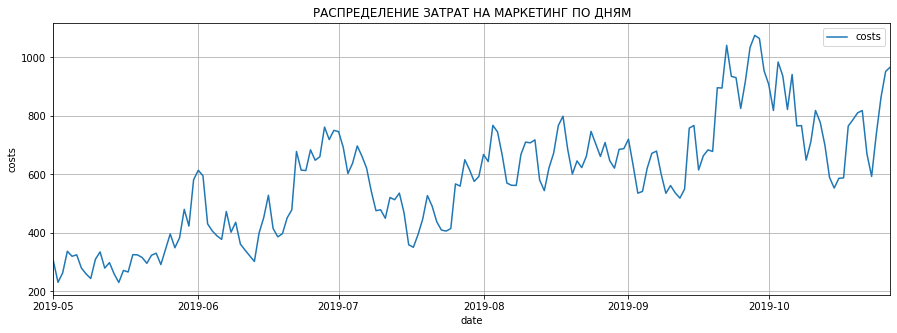

In [90]:
costs.groupby('dt').agg({'costs':'sum'}).plot(figsize=(15, 5))
plt.xlabel('date')
plt.ylabel('costs')
plt.title('РАСПРЕДЕЛЕНИЕ ЗАТРАТ НА МАРКЕТИНГ ПО ДНЯМ')
plt.grid(True)
plt.show()

- Мы видим как растут затраты на маркетинг. После привлечения большого количества пользователей, очевидно, увеличились и затраты на их удержание. Стоит обратить внимание на то, насколько эффективно расходуются средства на маркетинг: ведь как мы уже знаем - средний чек и количество покупок не растут вместе с затратами. 

**- Сколько в среднем стоило привлечение одного пользователя из каждого источника?**

Распределение CAC по источникам

In [91]:
profiles.groupby('channel').agg({'acquisition_cost':'mean'}
                               ).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


- Самыми дорогими каналами для привлечения стали FaceBoom и TipTop - лидеры по новым пользователям в США. Далее в рейтинге идут топ-каналы других стран. 

Общий CAC

In [92]:
profiles['acquisition_cost'].describe()

count    150008.000000
mean          0.703278
std           0.954097
min           0.000000
25%           0.000000
50%           0.247500
75%           1.108943
max           3.715385
Name: acquisition_cost, dtype: float64

In [93]:
profiles['acquisition_cost'].median()

0.24750000000000003

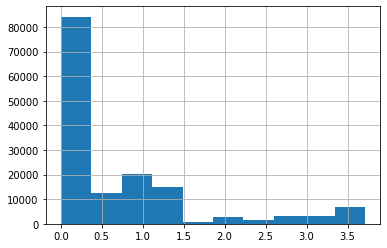

In [94]:
profiles['acquisition_cost'].hist(bins=10)

 - Мы видим, что медиана и среднее в CAC меньше единицы. Гистограмма показывает во сколько чаще всего нам обходится привлечение нового пользователя: очевидно, что стоимость привлечения на каналах FaceBoom, TipTop, AdNonSense больше стремится к выбросам, чем к среднему и медианному показателю. Стоит обратить внимание на экономическую эффективность этих каналов. 

## Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

In [95]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [96]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [97]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # что мы здесь делаем???
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [98]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [99]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [100]:
# функция для визуализации LTV и ROI

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Окупаемость рекламы для привлечения пользователей

Установим момент и горизонт анализа данных:

In [101]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14 #горизонт анализа 

In [102]:
profiles = profiles.query('channel != "organic"')

### Проанализируйте общую окупаемость рекламы

Посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi().

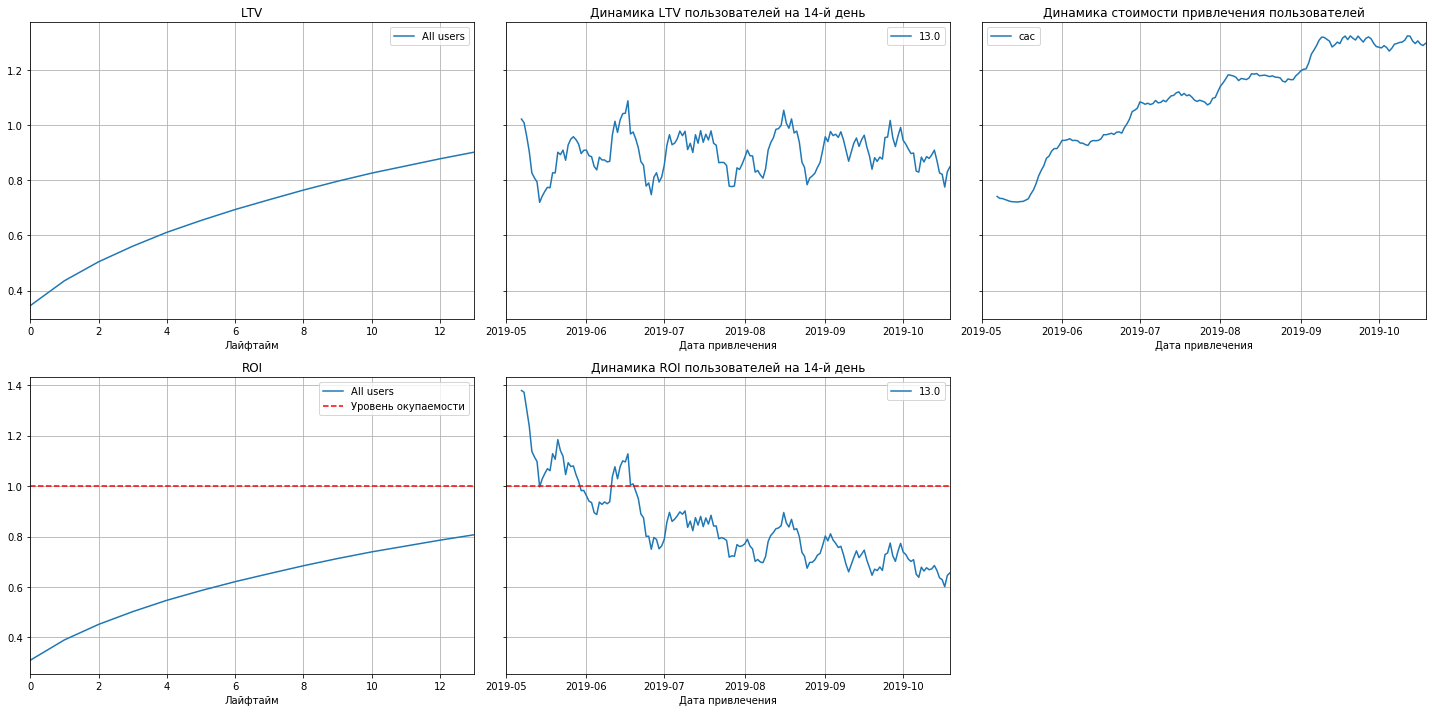

In [103]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать следующие выводы:

- Реклама не окупается. ROI в последнем лайфтайме только стремится к 80%, а его динамика вовсе отрицательна.
- CAC растёт. Значит, причины могут быть в увеличении рекламного бюджета.
- LTV достаточно стабилен, но имеет спады - обычно, в конце месяцы. И пиковые значения - обычно, в середине месяца. 

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

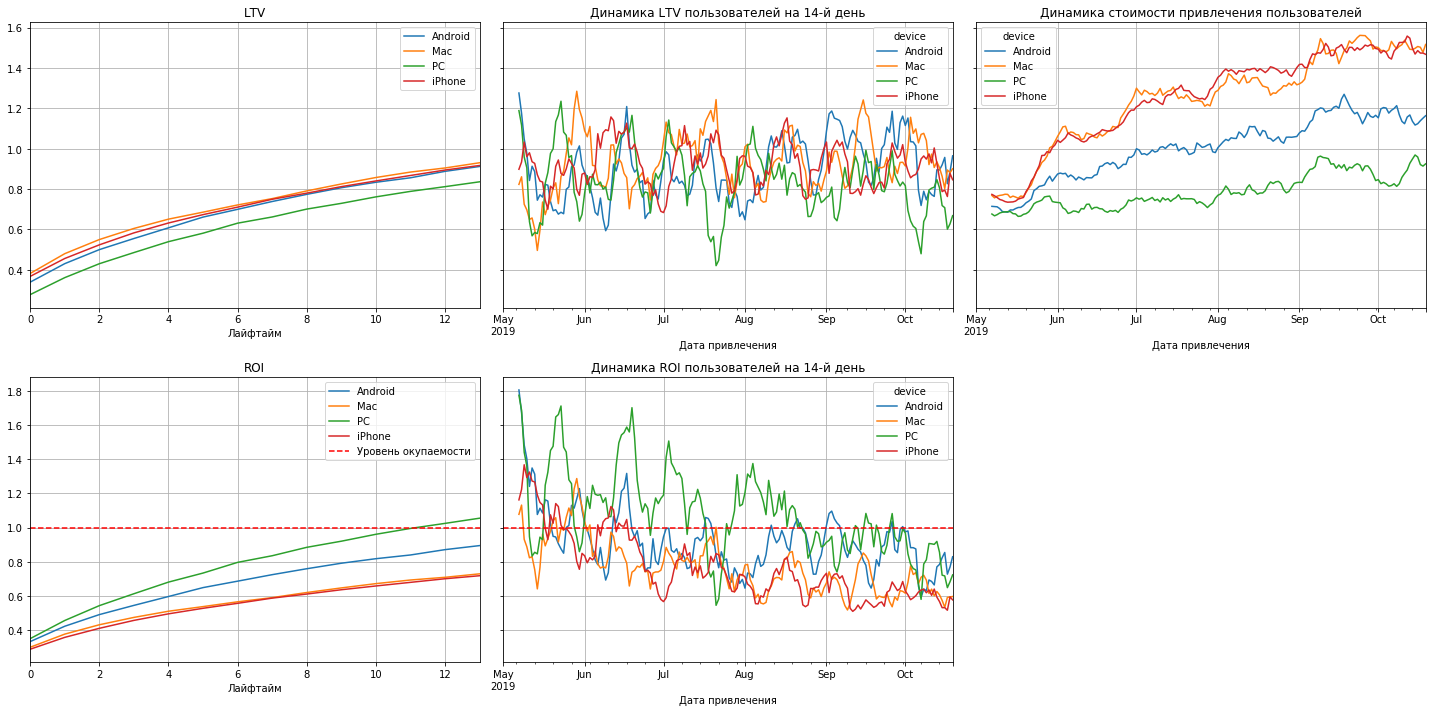

In [104]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Выводы:

- Реклама окупается только для пользователей PC, у этих всех устройств отрицательная динамика ROI.
- Стоимость привлечения растет для всех, а наиболее динамично растёт для тех устройств, где реклама не окупается сильнее всего: iPhone и Mac.
- LTV не имеет больших отличий для разных устройств. Он чуть ниже у PC, но зато качественней - это устройство единственное показало окупаемость

### Проанализируйте окупаемость рекламы с разбивкой по странам

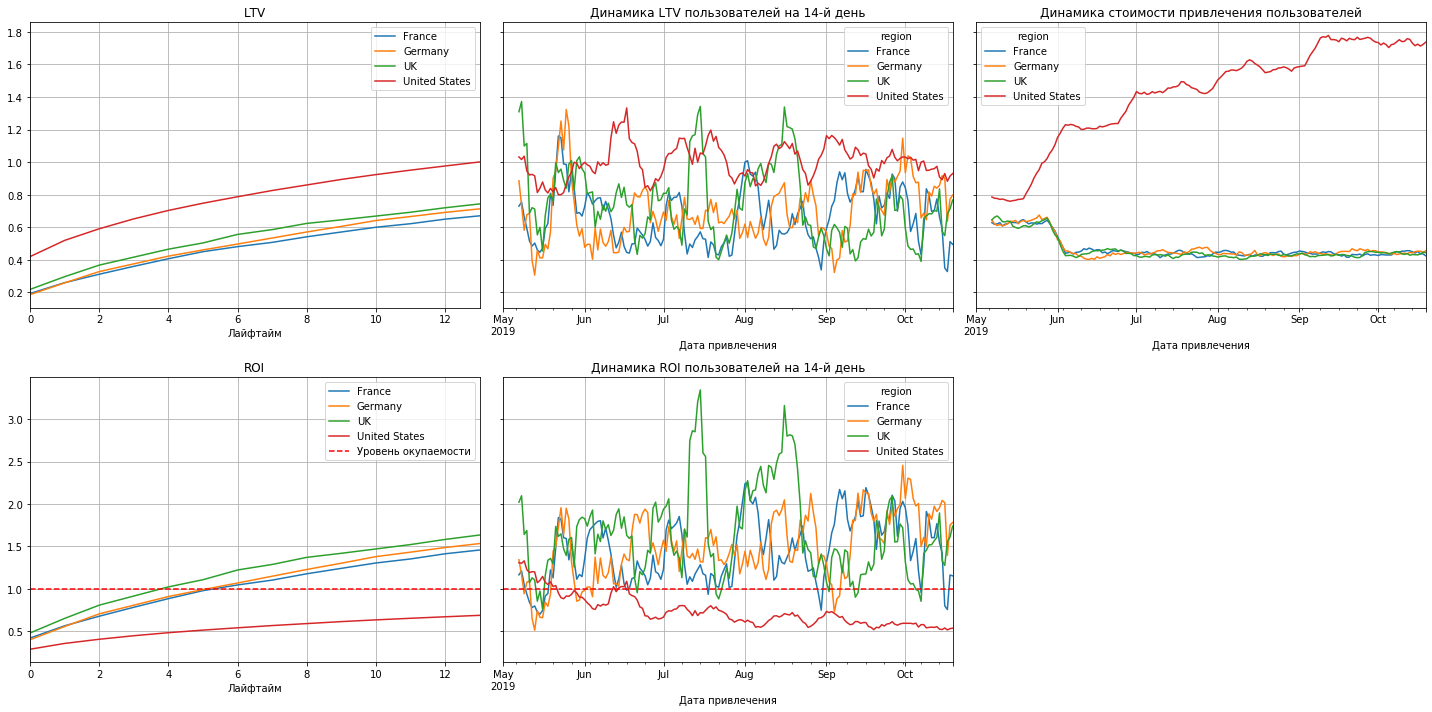

In [105]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

ВЫВОДЫ:

- Реклама окупается везде, кроме США.
- Стоимость привлечения пользователей для США в разы больше, чем для других стран, где стоимость привлечения примерно на одном уровне.
- Динамика LTV примерно одинакова для всех стран, но у США больше пиковых значений, чем у других стран
- Динамика ROI отрицательная только для США

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

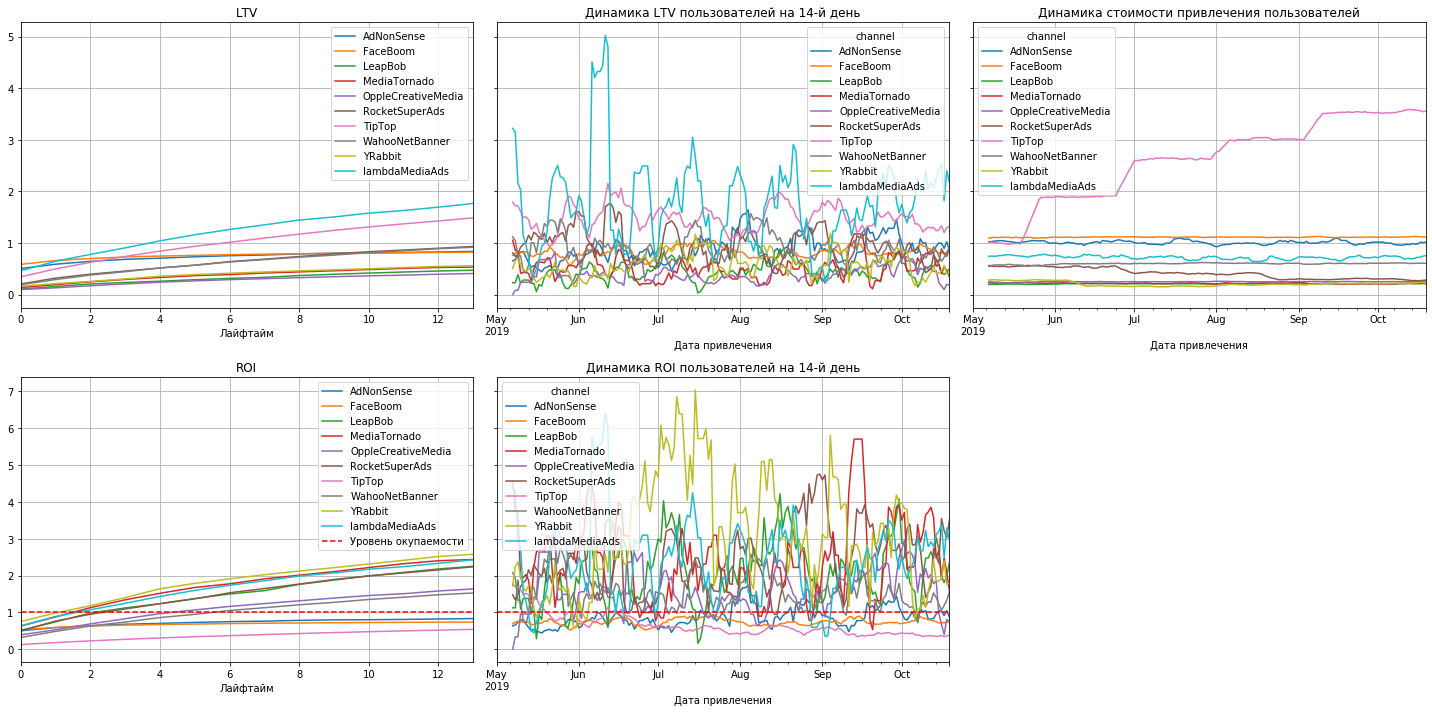

In [106]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

ВЫВОДЫ:

- Динамика LTV примерно одинакова для всех каналов, но TipTop и lambdaMediaAds имеют больший захват на пиковых значениях
- Реклама окупается везде, кроме TipTop, AdNonSense и FaceBoom - для них же наблюдается отрицательная динамика ROI
- Динамика стоимости привлечения сильно растёт для канала TipTop 

### Конверсия и удержание 

С РАЗБИВКОЙ ПО УСТРОЙСТВАМ

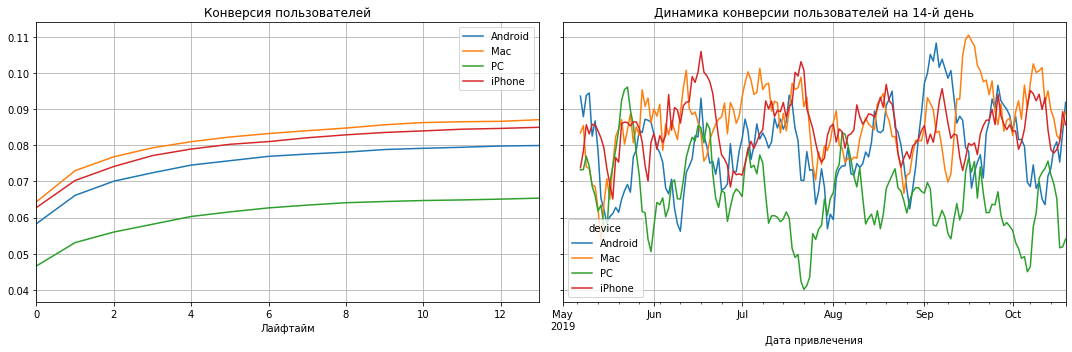

In [107]:
conversion_raw, conversion, conversion_history = get_conversion(profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
)

plot_conversion(conversion, conversion_history, horizon_days, window=7)

Пользователи Mac и iPhone конвертируются лучше всего. Но для полной картины лучше посмотреть на динамику удержания.

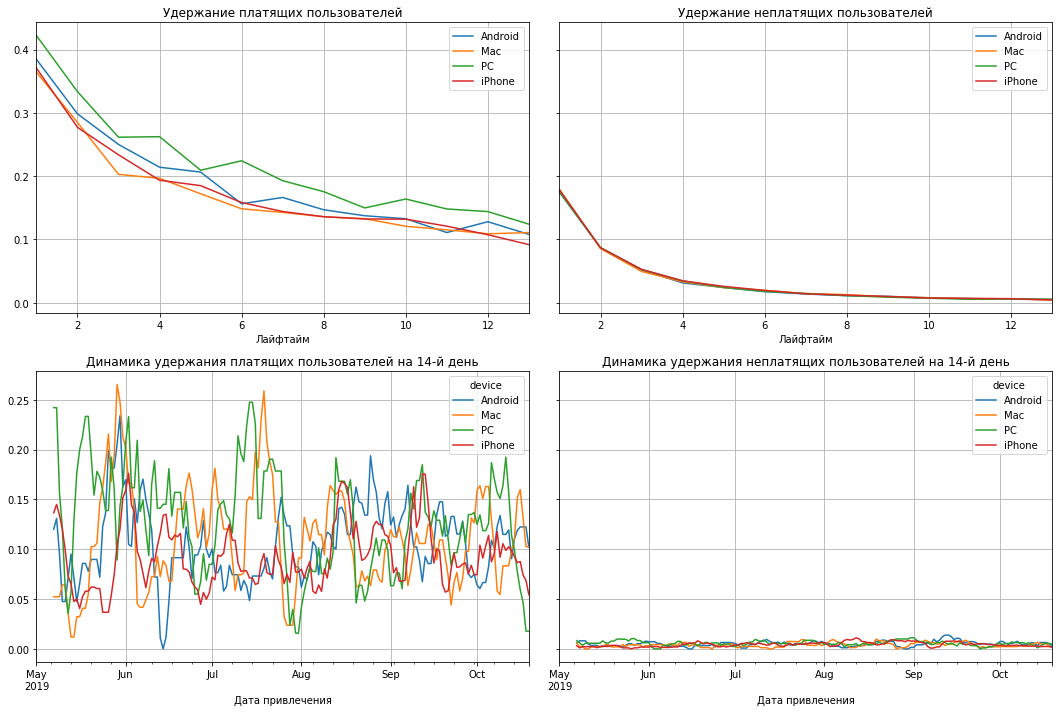

In [108]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Для платящих пользователей на PC и Android удержание немного лучше, чем на остальных устройствах.

С РАЗБИВКОЙ ПО СТРАНАМ

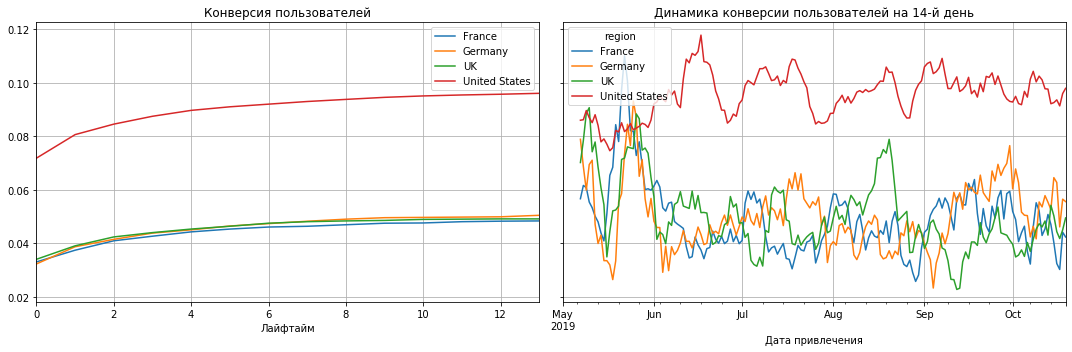

In [109]:
conversion_raw, conversion, conversion_history = get_conversion(profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
)

plot_conversion(conversion, conversion_history, horizon_days, window=7)

Лучше всего конвертируются пользователи из США. Однако, посмотрим на динамику удержания:

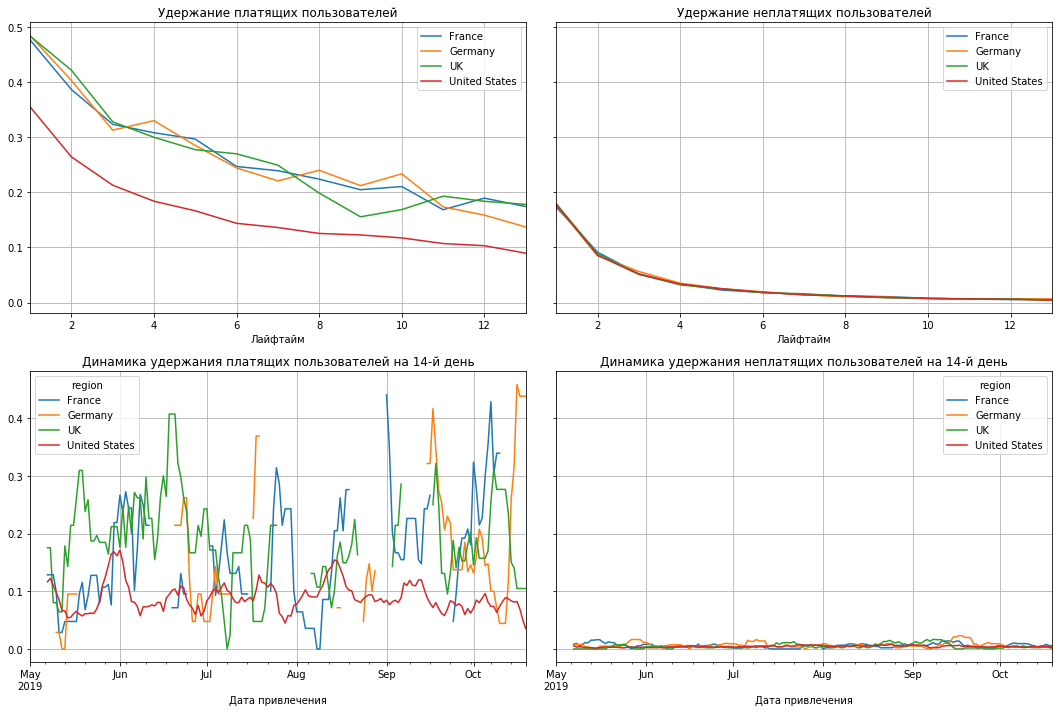

In [110]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Пользователи из США, несмотря на большую конверсию, удерживаются хуже всего. Для остальных стран ситуация примерна одинакова.

С РАЗБИВКОЙ ПО КАНАЛАМ

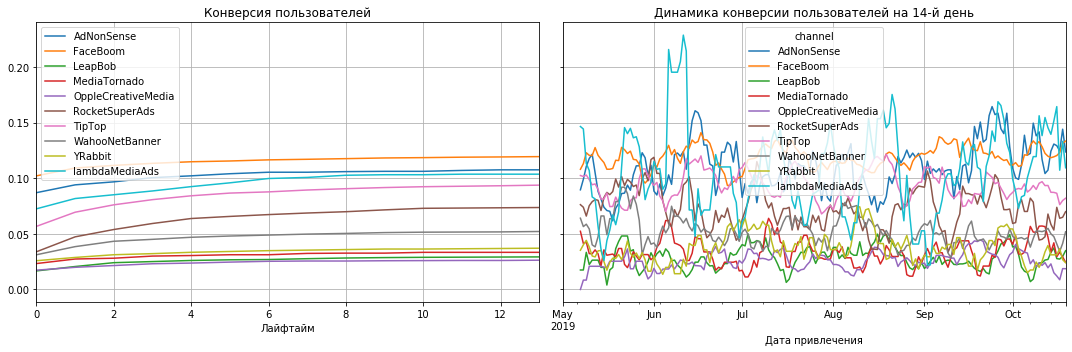

In [111]:
conversion_raw, conversion, conversion_history = get_conversion(profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
)

plot_conversion(conversion, conversion_history, horizon_days, window=7)

По конверсии пользователей лидируют каналы FaceBoom, AdNonSense, LambdaMediaAds. Посмотрим на удержание в этих каналах.

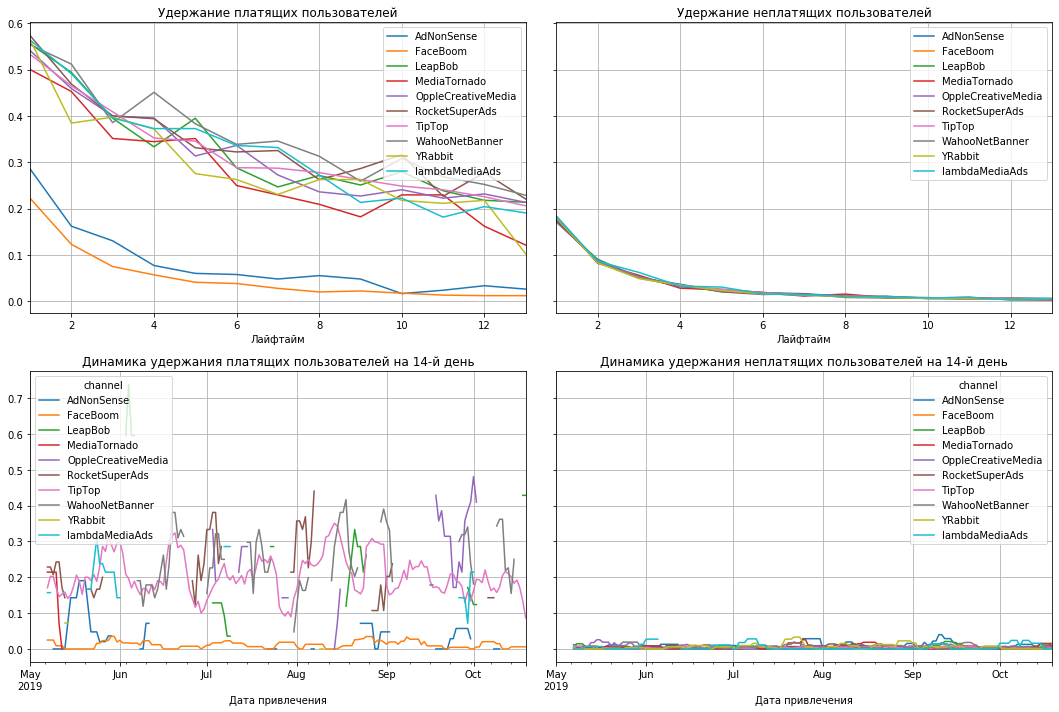

In [112]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Вывод: есть тенденция - хуже всего пользователи удерживаются там, где конверсия высокая: FaceBoom, AdNonSense. 

Ответы на вопросы:

**1.  Окупается ли реклама в целом?**

Нет. Реклама приблизилась к уровню окупаемости 80% в последнем лайфтайме, как мы можем видеть на графике ROI с общей окупаемостью рекламы

**2. Какие устройства, страны и каналы могут снижать окупаемость рекламы?**

Реклама не окупается для пользователей:
- устройств iPhone, Maс и Android
- стран США
- рекламных каналов TipTop, AdNonSense и FaceBoom

Таким образом, окупаемость рекламы данных пользователей (а также их отрицательная динамика ROI) могут отрицательно влиять на общую окупаемость рекламы

**3. Чем могут быть вызваны проблемы окупаемости?**

Рост стоимости привлечения тех пользователей, чья динамика ROI отрицательная и затраты на привлечение которых не окупаются. 

## Выводы

**- Выделите причины неэффективности привлечения пользователей**

Высокие затраты на привлечение пользователей из тех рекламных каналов/стран/устройств, где реклама не достигла уровня окупаемости:
- влияют на общий уровень окупаемости рекламы
- влияют на общую динамику затрат на привлечение

----

**- Сформируйте рекомендации для отдела маркетинга для повышения эффективности**

Руководствуясь причинами неэффективности привлечения пользователей стоит обратить внимание на следующие категории:
- пользователи с устройствами iPhone, Maс, Android
- пользователи стран США
- пользователи рекламных каналов TipTop, AdNonSense и FaceBoom

Для этих категорий пользователей разумным будет сократить затраты на их привлечение, вплоть до достижения уровня окупаемости общих затрат на рекламу.

Также, при анализе привлечения пользователей стоит обращать бóльшее внимание не на конверсию, а на удержание и динамику удержания пользователей и количество повторных покупок - это даст более полную и объективную картину и позволит принять своевременные и эффективные решения отделу маркетинга.


---

Категории пользователей, для которых реклама достигла уровня окупаемости:

- пользователи стран Европы
- пользователи PC
- пользователи, привлеченные из всех каналов, кроме TipTop, AdNonSense и FaceBoom

Так как пользователи данных категорий показывают высокие показатели удержания и окупаемости, то для них стоит разработать рекламные кампании, направленные на увеличение среднего чека и количества покупок. Таким образом, это может положительно повлиять на общие показатели как среднего чека, так и общей окупаемости, и, следовательно, общей выручки. Дополнительные средства позволят ускорить достижение общего уровня окупаемости, а также инвестировать в новые каналы для привлечения пользователей и расширить их географию.